In [85]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
PATH=Path('ddat/crowdAI/')

In [26]:
import numpy as np
trn_h = np.load(PATH/'15306e88-6631-4ba7-b1cf-c01ed319b9b5_train_heights.npy')
trn_cm = np.load(PATH/'7fb51f6a-ce03-4be5-9c19-0be3333d9122_subset_cm_train.npy')
test_cm = np.load(PATH/'7ac1e722-d625-48e6-bc0f-304164a31f61_subset_cm_test.npy')

In [27]:
trn_h.shape,trn_cm.shape,test_cm.shape

((784,), (9894, 784), (9894, 137))

DescribeResult(nobs=784, minmax=(142.24, 203.2), mean=173.21355867346938, variance=110.22950392247897, skewness=0.003018580310472076, kurtosis=-0.7144092919290799)
290 379 416 784


(array([  1.,  19.,  97., 113., 127., 173., 121., 107.,  21.,   5.]),
 array([142.24 , 148.336, 154.432, 160.528, 166.624, 172.72 , 178.816,
        184.912, 191.008, 197.104, 203.2  ]),
 <a list of 10 Patch objects>)

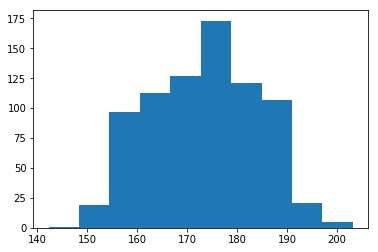

In [86]:
print(stats.describe(trn_h))
print(sum(trn_h<170),sum(trn_h<173),sum(trn_h<175),len(trn_h))
plt.hist(trn_h)

In [80]:
from sklearn import linear_model
import numpy as np
#Load training data
x_train = trn_cm.T
y_train = trn_h
x_test = test_cm.T

#Replace nan values in the training and testing set with an arbitrary number
inds = np.where(np.isnan(x_train))
x_train[inds] = -100
inds = np.where(np.isnan(x_test))
x_test[inds] = -100


# Instantiate a linear model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Predict the heights for the test set
heights = regr.predict(x_test)

#Convert heights from np.array to a list (to ensure it is JSON serializable)
heights = heights.tolist()

In [50]:
# Instantiate a linear model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Predict the heights for the test set
heights = regr.predict(x_test)

#Convert heights from np.array to a list (to ensure it is JSON serializable)
heights = heights.tolist()

In [81]:
import crowdai

# Create the challenge object by authentication with crowdAI with your API_KEY
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")

challenge.submit(heights)
challenge.disconnect()


CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 7e46f057-0476-4bdc-b5a9-5a28b1cfdc36


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 7e46f057-0476-4bdc-b5a9-5a28b1cfdc36


100% |██████████|[00:00<00:00]  101.85% /s] 


CrowdAI.Event.Job.INFO : (7e46f057-0476-4bdc-b5a9-5a28b1cfdc36) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.307562018052 ; MSE : 70.3897709762
CrowdAI.Event.Job.COMPLETE : 7e46f057-0476-4bdc-b5a9-5a28b1cfdc36	   🍺 


In [82]:
from sklearn.svm import SVR
# Create the challenge object by authentication with crowdAI with your API_KEY
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")

#Load training data
x_train = trn_cm.T
y_train = trn_h
x_test = test_cm.T

#Replace nan values in the training and testing set with an arbitrary number
inds = np.where(np.isnan(x_train))
x_train[inds] = -100
inds = np.where(np.isnan(x_test))
x_test[inds] = -100


# Instantiate a linear model
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(x_train, y_train)

# Predict the heights for the test set
heights = clf.predict(x_test)

#Convert heights from np.array to a list (to ensure it is JSON serializable)
heights = heights.tolist()

challenge.submit(heights)
challenge.disconnect()

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED
CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : f41dd6a9-edf6-4c37-b81b-3968aa56f09f


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : f41dd6a9-edf6-4c37-b81b-3968aa56f09f


100% |██████████|[00:01<00:00]  93.66% /s] 


CrowdAI.Event.Job.INFO : (f41dd6a9-edf6-4c37-b81b-3968aa56f09f) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.201704860793 ; MSE : 81.1506784509
CrowdAI.Event.Job.COMPLETE : f41dd6a9-edf6-4c37-b81b-3968aa56f09f	   🍺 


# Linear Model

## Data Prepare

In [32]:
baranger_data=pd.read_csv(PATH/'Baranger_Data_crowdAI.txt',sep='\t',index_col=0)
train = baranger_data[baranger_data.Test==0]
test = baranger_data[baranger_data.Test==1]

In [51]:
height = pd.read_csv(PATH/'phenotypes.csv',index_col=0)

In [60]:
height = height.loc[[x in train.index for x in height.IID]]

In [41]:
train.head()

,Test,PC1,PC2,PC3,Sex,PRS
IID,,,,,,
1,0,0.009527,-0.009397,0.018013,1,-0.000608
2,0,0.011700,-0.011119,0.007663,2,-0.000380
3,0,-0.051658,0.175381,-0.008953,1,-0.001026
4,0,0.011943,-0.014508,0.030367,1,-0.000254
5,0,0.001568,-0.007269,-0.040122,1,-0.000781


## Linear Model by gender

In [53]:
from sklearn import linear_model
import crowdai

In [74]:
x_train = train['Sex'].reshape(761,1)
y_train = height['Height']
x_test = test['Sex'].reshape(137,1)

# Instantiate a linear model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Predict the heights for the test set
heights = regr.predict(x_test)
#Convert heights from np.array to a list (to ensure it is JSON serializable)
heights = heights.tolist()

# Create the challenge object by authentication with crowdAI with your API_KEY
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
challenge.submit(heights)
challenge.disconnect()

/home/ahmadA/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/home/ahmadA/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 3526c400-ae24-44d5-b790-68051c0c655b


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 3526c400-ae24-44d5-b790-68051c0c655b


100% |██████████|[00:00<00:00]  101.40% /s] 


CrowdAI.Event.Job.INFO : (3526c400-ae24-44d5-b790-68051c0c655b) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.421175599356 ; MSE : 58.8403843506
CrowdAI.Event.Job.COMPLETE : 3526c400-ae24-44d5-b790-68051c0c655b	   🍺 


## Linear Model by gender + PCs

In [78]:
x_train = train.iloc[:,1:5]
y_train = height['Height']
x_test = test.iloc[:,1:5]

# Instantiate a linear model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Predict the heights for the test set
heights = regr.predict(x_test)
#Convert heights from np.array to a list (to ensure it is JSON serializable)
heights = heights.tolist()

# Create the challenge object by authentication with crowdAI with your API_KEY
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
challenge.submit(heights)
challenge.disconnect()

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : cb6cf503-7d50-4477-aeda-f995fb19b7b5


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : cb6cf503-7d50-4477-aeda-f995fb19b7b5


100% |██████████|[00:00<00:00]  106.14% /s] 


CrowdAI.Event.Job.INFO : (cb6cf503-7d50-4477-aeda-f995fb19b7b5) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.432761910646 ; MSE : 57.6625780786
CrowdAI.Event.Job.COMPLETE : cb6cf503-7d50-4477-aeda-f995fb19b7b5	   🍺 


## Linear Model by gender +PCs+PRS

In [79]:
x_train = train.iloc[:,1:6]
y_train = height['Height']
x_test = test.iloc[:,1:6]

# Instantiate a linear model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Predict the heights for the test set
heights = regr.predict(x_test)
#Convert heights from np.array to a list (to ensure it is JSON serializable)
heights = heights.tolist()

# Create the challenge object by authentication with crowdAI with your API_KEY
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
challenge.submit(heights)
challenge.disconnect()

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : ebcc8c3f-5df9-4856-8737-2bbc5ea3d7be


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : ebcc8c3f-5df9-4856-8737-2bbc5ea3d7be


100% |██████████|[00:01<00:00]  96.75% /s] 


CrowdAI.Event.Job.INFO : (ebcc8c3f-5df9-4856-8737-2bbc5ea3d7be) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.534577998454 ; MSE : 47.3124654485
CrowdAI.Event.Job.COMPLETE : ebcc8c3f-5df9-4856-8737-2bbc5ea3d7be	   🍺 


In [83]:
import random
# Create the challenge object by authentication with crowdAI with your API_KEY
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")

# Create a list of 137 randomly predicted heights
data = [random.randint(150, 200) for x in range(137)]

# Submit to crowdAI
challenge.submit(data)
challenge.disconnect()

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 1e2259cc-3966-4da0-8ba6-c0bef30e447c


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 1e2259cc-3966-4da0-8ba6-c0bef30e447c


100% |██████████|[00:00<00:00]  108.23% /s] 


CrowdAI.Event.Job.INFO : (1e2259cc-3966-4da0-8ba6-c0bef30e447c) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -1.91950561829 ; MSE : 296.782292701
CrowdAI.Event.Job.COMPLETE : 1e2259cc-3966-4da0-8ba6-c0bef30e447c	   🍺 


## Data Explore

## Make Phenotypes File

In [13]:
import pandas as pd

In [7]:
from pandas_plink import read_plink
(bim, fam, G) = read_plink('ddat/crowdAI/OpenSNP_train')

Mapping files: 100%|██████████| 3/3 [00:11<00:00,  5.27s/it]


In [22]:
tmp=pd.DataFrame({"IID":np.array(fam.iid),"Height":trn_h})

In [35]:
tmp.to_csv(f"{PATH}/phenotypes.csv")